<div align="center"> <h1>Изучение параметрической генерации волн при $\delta = 0$</h1></div>

In [ ]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.signal import argrelextrema

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})

In [2]:
# system of differential equations (SDE)
def model(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    
    dxdt = y * z - delta * x
    dydt = x * z - delta * y
    dzdt = -x * y - delta * z
    drdt = [dxdt, dydt, dzdt]
    return drdt

In [29]:
# params
delta = 0
t = np.linspace(0, 40, 1000)

# initial conditions
r0 = [0.1, 0, 1]

# solve SDE
r = odeint(model, r0, t)

# calculate
ppe = t[np.argmin(r[:,2])] - t[np.argmax(r[:,2])] 

Период перекачки энергии равен: 7.367
Коэффициент преобразования мощности X: 1.010
Коэффициент преобразования мощности Y: 1.000
Коэффициент преобразования мощности Z: 1.000


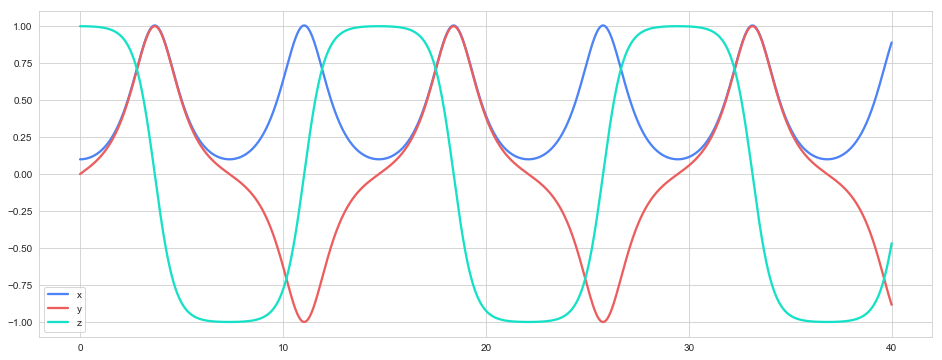

In [28]:
# plotting graphs
xt = np.linspace(0, 100, 11) # for xticks

plt.figure(figsize = (16, 6))
plt.xticks(xt)
plt.plot(t, r[:,0], color = '#4d83f6', lw = 2.3, label = 'x')
plt.plot(t, r[:,1], color = '#ec5e5e', lw = 2.3, label = 'y')
plt.plot(t, r[:,2], color = '#16e1c7', lw = 2.3, label = 'z')
plt.legend()

# print some results
print(f'Период перекачки энергии равен: {ppe:.3f}')
print("Коэффициент преобразования мощности X: %.3f" % np.max(r[:,0])**2)
print("Коэффициент преобразования мощности Y: %.3f" % np.max(r[:,1])**2)
print("Коэффициент преобразования мощности Z: %.3f" % np.max(r[:,2])**2)